**SCRIVERE UN NOTEBOOK CHE PERMETTA AD UN UTENTE DI VISUALIZZARE SU UNA MAPPA DI MILANO IL PERCORSO DI UNA LINEA DEI MEZZI DI TRASPORTO. L'UTENTE INSERISCE IL NUMERO DELLA LINEA E IL PROGRAMMA NE VISUALIZZA IL PERCORSO. BUON LAVORO.**

In [ ]:
!pip install geopandas
!pip install contextily

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
%matplotlib inline
import pandas as pd
import geopandas
import contextily
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [24]:
atm = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/tpl_percorsi_shp.zip")
atm

,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742..."
1,1,TRAM,9457,As,Greco - Roserio,Canonico,13.97,47,"LINESTRING (9.21625 45.49493, 9.21538 45.49486..."
2,10,TRAM,10930,As,Lunigiana - 24 Maggio (LAV. MONUMENTALE),Canonico,10.12,35,"LINESTRING (9.20557 45.49136, 9.20555 45.49137..."
3,10,TRAM,10933,Di,24 Maggio - Lunigiana (LAV. MONUMENTALE),Canonico,9.99,35,"LINESTRING (9.17930 45.45195, 9.17931 45.45195..."
4,115,BUS,10025,As,Gratosoglio - P.za Diaz,Canonico,7.35,21,"LINESTRING (9.17375 45.40309, 9.17381 45.40305..."
...,...,...,...,...,...,...,...,...,...
414,965,BUS,7613,None,Milano - Pioltello,Canonico,11.36,16,"LINESTRING (9.21957 45.48438, 9.21998 45.48436..."
415,98,BUS,7814,Di,Lotto M1 M5 - Famagosta M2,Canonico,8.26,23,"LINESTRING (9.14160 45.47964, 9.14166 45.47953..."
416,98,BUS,9899,As,Famagosta M2 - Lotto M1 M5,Canonico,7.86,23,"LINESTRING (9.16884 45.43677, 9.16884 45.43673..."
417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514..."


In [ ]:
atm.plot()

In [16]:
#atm['linea'] = atm['linea'].astype(int)
#atm[atm['linea'] == 99]

UNA Linea: 5


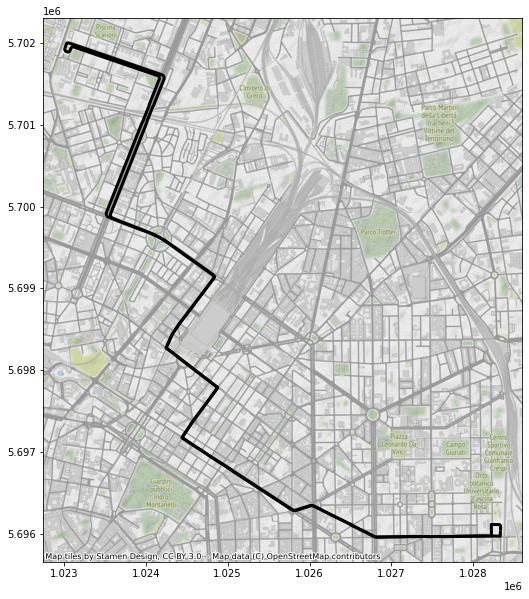

In [35]:
nLinea = input('UNA Linea: ')
if nLinea in list(atm.linea):
  find = atm[atm['linea'] == nLinea].geometry.squeeze()
  ax = find.to_crs(epsg=3857).plot(figsize=(10,10),facecolor="none",edgecolor="K", linewidth=3)
  contextily.add_basemap(ax)
else:
  print('Errore')

In [36]:
fermate = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/tpl_fermate_shp.zip")
fermate

,id_amat,ubicazione,linee,geometry
0,10001,"Via Matteotti, 19 prima di Via Cavour",89,POINT (9.14099 45.53151)
1,10002,"Via Cavour, 32/e dopo Via Morandi (ACI)",89,POINT (9.14446 45.53231)
2,10003,"Via Bovisasca, 18 dopo Via C.Battisti",89,POINT (9.14826 45.52691)
3,10008,"Via Bovisasca, 15/A prima di Via Baracca",89,POINT (9.14845 45.52675)
4,10009,Via Rimembranze prima di Via Cornicione,89,POINT (9.14378 45.53003)
...,...,...,...,...
4728,19891,Besta,35,POINT (9.16428 45.51895)
4729,19892,Besta,35,POINT (9.16465 45.51918)
4730,19903,Mascagni,"54,61",POINT (9.20218 45.46604)
4731,19908,Durando,82,POINT (9.16313 45.50649)


UNA Linea: 5


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:82: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if is_color_like(value):


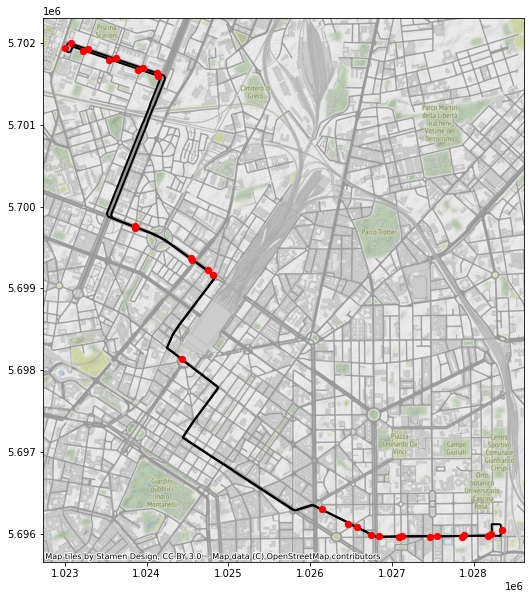

In [38]:
nLinea1 = input('UNA Linea: ')
if nLinea1 in list(atm.linea):
  find = atm[atm['linea'] == nLinea1].geometry.squeeze()
  fermata = fermate[fermate["linee"] == nLinea1].geometry.squeeze()
  ax = find.to_crs(epsg=3857).plot(figsize=(10,10),facecolor="none",edgecolor="K", linewidth=2)
  fermata.to_crs(epsg=3857).plot(ax=ax, color= "R", markersize=40, zorder=2)
  contextily.add_basemap(ax)
else:
  print('Errore')

In [ ]:
fermate_copy=fermate.copy()
fermate_copy

In [40]:
via_input = input("Inserisci il nome di una via: ")
aa= fermate_copy[fermate_copy["ubicazione"].str.contains(via_input)]
aa["linee"]=aa.linee.str.split(",")
dfFin=aa.explode('linee')
print("le linee disponibili nella via "+via_input+ " sono:",str(len(dfFin["linee"].unique())),dfFin["linee"].unique())

Inserisci il nome di una via: Besta
le linee disponibili nella via Besta sono: 1 ['35']


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
